In [45]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import matplotlib as mpl

In [46]:
# Path ke folder data CSV
folder_path = '../cleaned_data/'  # Ganti dengan path folder yang benar
csv_files = ["1.5 7.0 1.csv", "1.5 7.0 2.csv", "1.5 7.0 3.csv",
             "1.0 7.0 1.csv", "1.0 7.0 2.csv", "1.0 7.0 3.csv",
             "2.0 7.0 1.csv", "2.0 7.0 2.csv", "2.0 7.0 3.csv",
             "1.5 6.0 1.csv", "1.5 6.0 2.csv", "1.5 6.0 3.csv",
             "1.5 8.0 1.csv", "1.5 8.0 2.csv", "1.5 8.0 3.csv"]

In [47]:
# function to remove value x in list "data"
def remove_value(data, x):
    return [value for value in data if value != x]

# function to find average of flat peak
def avg_peak(x, y, peak):
    flat_peak = [x[peak]]
    
    #check backward
    i=1
    while(y[peak-i] == y[peak]):
        flat_peak.append(x[peak-i])
        i+=1
    
    #check forward
    i=1
    while(y[peak+i] == y[peak]):
        flat_peak.append(x[peak+i])
        i+=1
    
    return sum(flat_peak)/len(flat_peak)

# adjust ylim for all
def adjust_ylim(variasi_ke, lim_var_1 = None, lim_var_2 = None, lim_var_3 = None, lim_var_4 = None, lim_var_5 = None, ax=None):
    if(ax==None):
        if(variasi_ke == 1 and lim_var_1 != None):
            plt.ylim(lim_var_1)
        elif(variasi_ke == 2 and lim_var_2 != None):
            plt.ylim(lim_var_2)
        elif(variasi_ke == 3 and lim_var_3 != None):
            plt.ylim(lim_var_3)
        elif(variasi_ke == 4 and lim_var_4 != None):
            plt.ylim(lim_var_4)
        elif(variasi_ke == 5 and lim_var_5 != None):
            plt.ylim(lim_var_5)
    else:
        if(variasi_ke == 1 and lim_var_1 != None):
            ax.set_ylim(lim_var_1)
        elif(variasi_ke == 2 and lim_var_2 != None):
            ax.set_ylim(lim_var_2)
        elif(variasi_ke == 3 and lim_var_3 != None):
            ax.set_ylim(lim_var_3)
        elif(variasi_ke == 4 and lim_var_4 != None):
            ax.set_ylim(lim_var_4)
        elif(variasi_ke == 5 and lim_var_5 != None):
            ax.set_ylim(lim_var_5)

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3
4 1
4 2
4 3
5 1
5 2
5 3


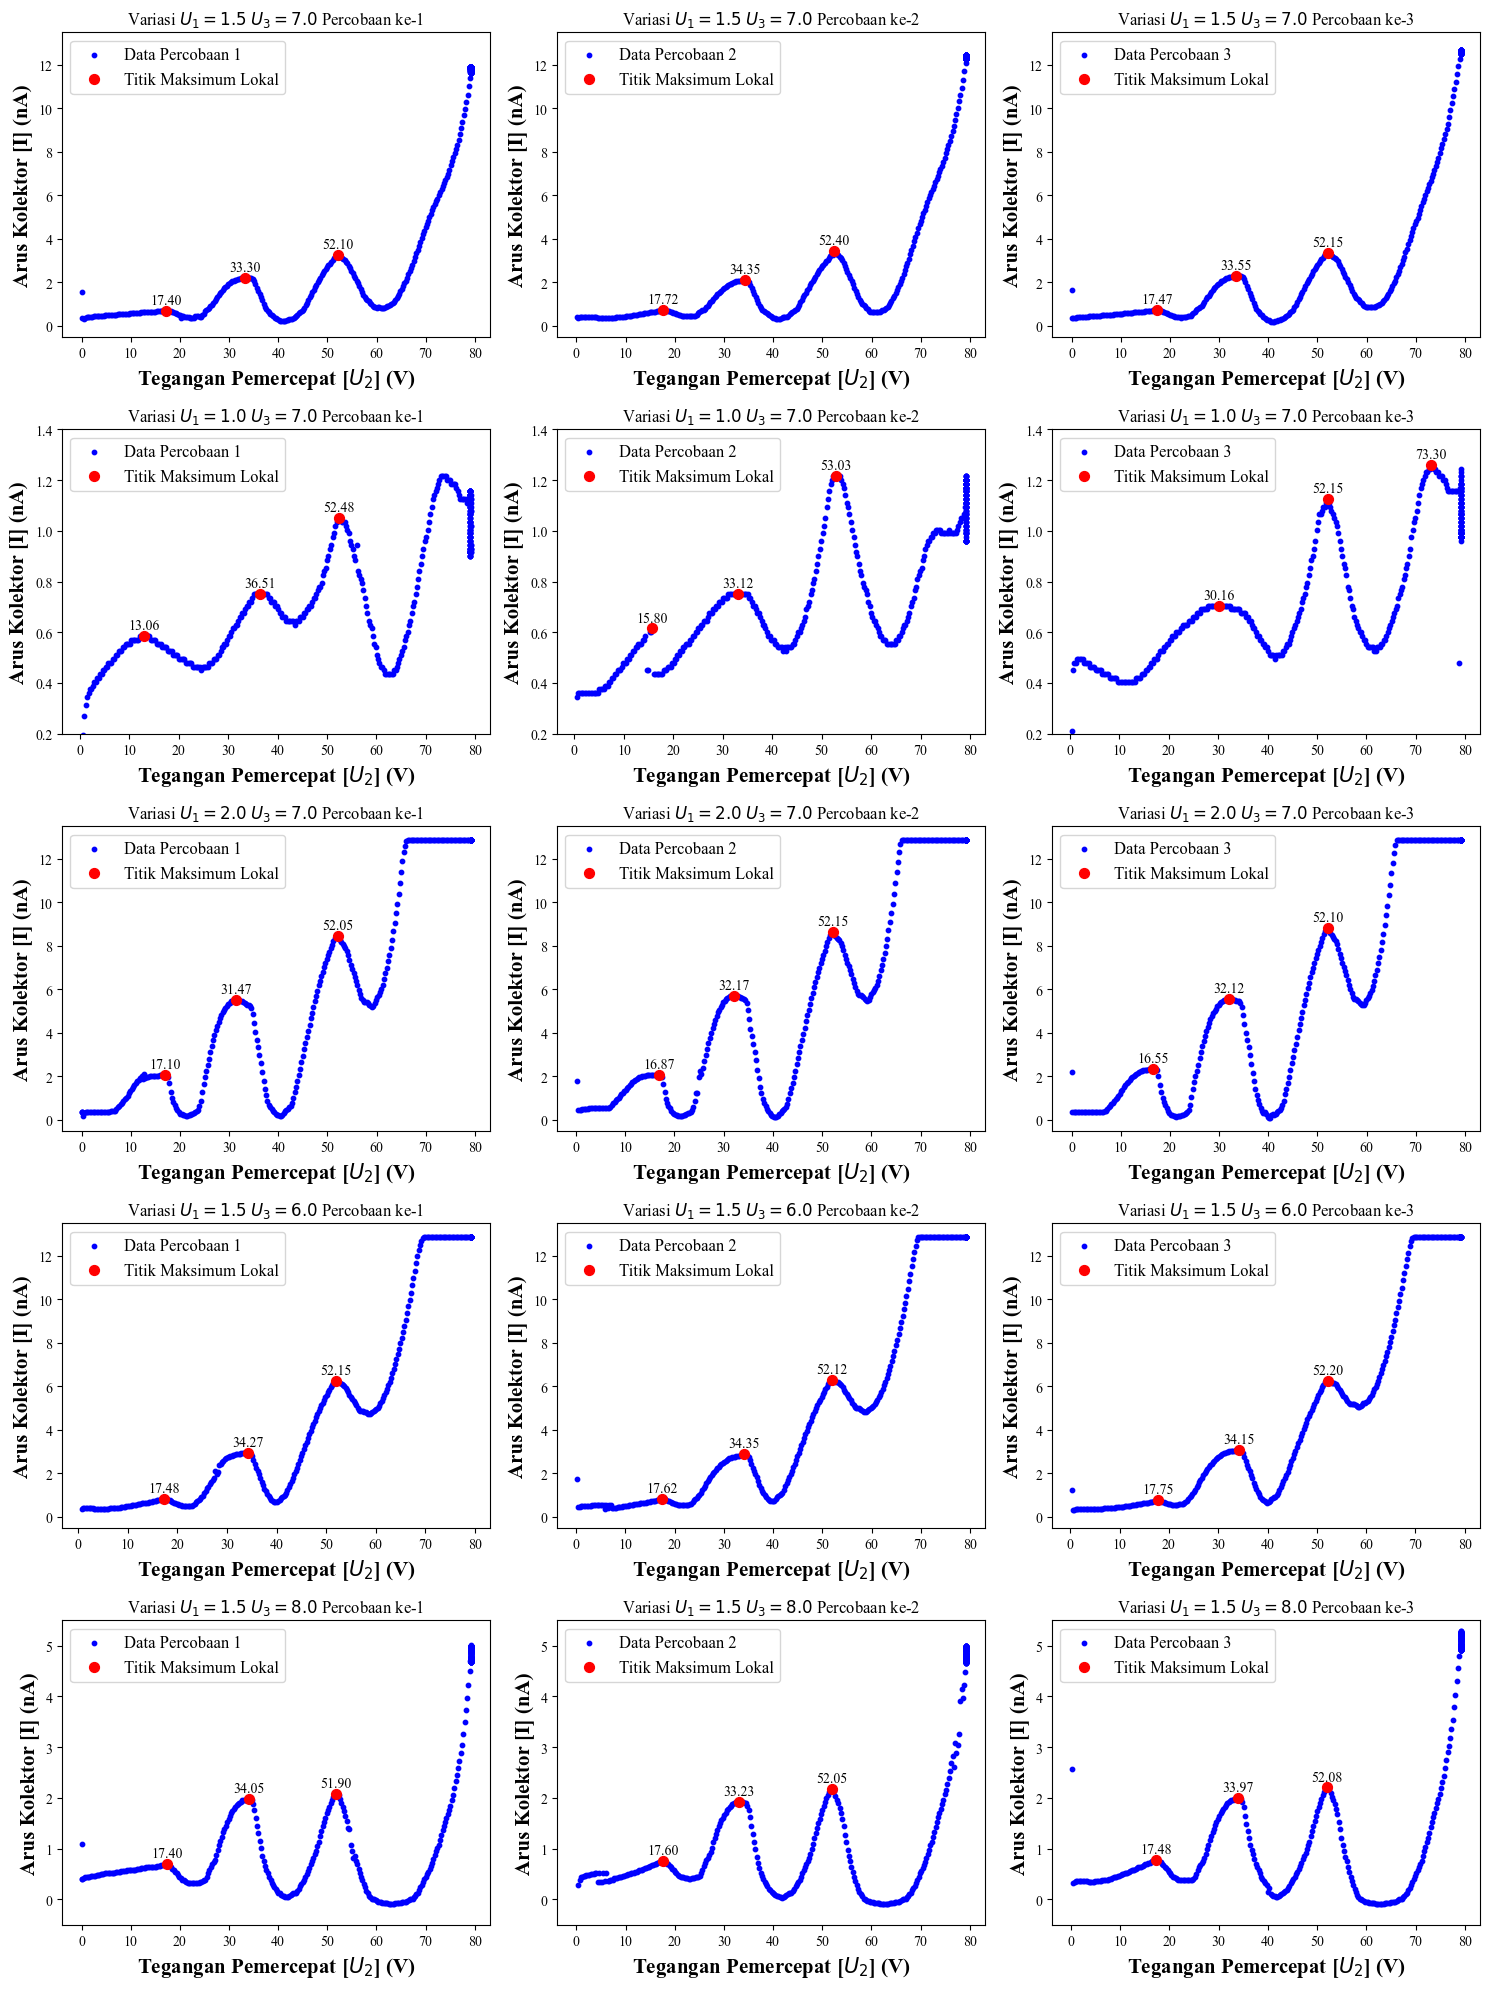

In [ ]:
# gambaran semuanya

# Set up a figure with subplots
num_sheets = len(csv_files)  # Adjusts based on the actual number of sheets
n=0

# Set the font to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Set up a figure with 5x3 subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 20))  # Adjust size as needed
axes = axes.flatten()  # Flatten to simplify indexing

# matrix to store the peaks' U3
x_peak = [[[0 for _ in range(3)] for _ in range(3)] for _ in range(5)]

# Loop through each sheet
for i, csv_file in enumerate(csv_files[:15]):  
    n+=1 # grafik ke berapa
    variasi_ke = (n-1) // 3 + 1
    percobaan_ke = n % 3
    if(percobaan_ke == 0):
        percobaan_ke +=3

    # Load data from the current sheet
    file_path = os.path.join(folder_path, csv_file)
    data = pd.read_csv(file_path, sep=',')
    
    # Assuming 'x' and 'y' columns in each sheet
    x = data['Acceleration voltage U_B / V']
    y = data['Collector current I_A / nA']
    
    # Find local peaks in the y data
    peaks0, _ = find_peaks(y, distance=30)
    if(n==7): # fine tune graph ke4
        y_dummy = y.copy()
        y_dummy[:52] = [0 for i in range(52)]
        peaks0, _ = find_peaks(y_dummy, distance=30)

    # remove x lower than 10V, higher than 70V
    peaks1 = np.array(peaks0)
    threshold_x= 255
    peaks = peaks1[(peaks1 <= 274) & (peaks1 >=25)]
    if(n==4):
        peaks = peaks1[(peaks1 <= 255) & (peaks1 >=25)]
    # print(peaks)

    peaks2 = peaks.copy()
    ref = y[peaks[0]]
    for j in peaks:
        if(y[j]<ref):
            peaks2 = remove_value(peaks,j)
        
        else:
            ref= y[j]
    peaks = peaks2

    # Plot on the corresponding subplot
    ax = axes[i]
    # Scatter plot for the current sheet 
    # ax.figure(figsize=(10, 6))
    ax.scatter(x, y, color='blue', s=10, label=('Data Percobaan '+str(percobaan_ke)))
    ax.scatter(x[peaks], y[peaks], color='red', s=50, label='Titik Maksimum Lokal')
    
    # Annotate each peak with its x-coordinate
    peak_count = 0
    for peak in peaks:
        x_peak[variasi_ke - 1][percobaan_ke - 1][peak_count] = avg_peak(x, y, peak)
        ax.annotate(f"{x_peak[variasi_ke - 1][percobaan_ke - 1][peak_count]:.2f}", (x[peak], y[peak]), textcoords="offset points", xytext=(0,5), ha='center')
        peak_count += 1
    
    # Set titles and labels for each subplot
    ax.set_xlabel('Tegangan Pemercepat [$U_{2}$] (V)', fontsize=15, fontweight='bold')
    ax.set_ylabel('Arus Kolektor [I] (nA)', fontsize=15, fontweight='bold')
    # ax.set_xticks(fontsize=12)
    # ax.set_yticks(fontsize=12)
    ax.legend(fontsize=12, loc='upper left')
    ax.set_title(f'Variasi $U_{1}={csv_file[0:3]}$ $U_{3}={csv_file[4:7]}$ Percobaan ke-{csv_file[8]}')
    adjust_ylim(variasi_ke, (-0.5,13.5), (0.2, 1.4), (-0.5, 13.5), (-0.5, 13.5), (-0.5, 5.5), ax)

    # Save the figure with high resolution
    # plt.savefig(f'figs/var{variasi_ke}/{csv_file}.png', dpi=300, bbox_inches='tight')  # Adjust dpi as needed

plt.tight_layout()
plt.show()

In [54]:
print(x_peak)

# matrix substractor
def mat_subs(A, B):
    C = []
    for i in range(len(A)):
        C.append([])
        for j in range(len(A[0])):
            C[i].append(A[i][j] - B[i][j]) 
    return C
def mat_index_remover(A, index):
    C = []
    for i in range(len(A)):
        C.append([])
        for j in range(len(A[0])):
            C.append([])
            for k in range(len(A[0][0])):
                if(k!=index):
                    C[i][j].append(A[i][j][k])
    return C
            
# hitung selisih peak bersebelahan
DeltaU = x_peak.copy()
DeltaU[:][:][0] = mat_subs(x_peak[:][:][1],x_peak[:][:][0])
DeltaU[:][:][1] = mat_subs(x_peak[:][:][2], x_peak[:][:][1])
DeltaU = mat_index_remover(DeltaU[:][:][:], 2)

[[[17.4, 33.3, 52.1], [17.716666666666665, 34.35, 52.4], [17.466666666666665, 33.55, 52.15]], [[13.0625, 36.513636363636365, 52.48333333333333], [15.8, 33.11666666666666, 53.03333333333333], [30.164705882352944, 52.15, 73.30000000000001]], [[17.1, 31.46666666666667, 52.05], [16.866666666666667, 32.166666666666664, 52.15], [16.55, 32.11666666666667, 52.1]], [[17.475, 34.266666666666666, 52.15], [17.625, 34.35, 52.125], [17.75, 34.15, 52.2]], [[17.4, 34.05, 51.9], [17.6, 33.233333333333334, 52.05], [17.475, 33.96666666666667, 52.075]]]


IndexError: list index out of range

In [50]:
import pandas as pd

# Example 5x3 matrix (replace with your actual matrix)
matrix = [
    [1.1, 2.2, 3.3],
    [4.4, 5.5, 6.6],
    [7.7, 8.8, 9.9],
    [3.3, 5.5, 7.7],  # Averages for each "variasi"
]

# Transpose the matrix
matrix_transposed = list(zip(*matrix))  # Transpose using zip

# Prepare the first column ("Percobaan")
first_column = ["1", "2", "3", "Average"]

# Column titles
columns = pd.MultiIndex.from_tuples(
    [("Percobaan", "")] + [("ΔŪ (V)", f"Variasi {i+1}") for i in range(5)]
)

# Create the DataFrame
# Fill only the available transposed data for "Variasi 1" to "Variasi 3"
data = {
    ("Percobaan", ""): first_column,
    **{
        ("ΔŪ (V)", f"Variasi {i+1}"): (matrix_transposed[i] if i < len(matrix_transposed) else [""] * 4)
        for i in range(5)
    },
}

df = pd.DataFrame(data, columns=columns)

# Display the table
print(df)


  Percobaan   ΔŪ (V)                                        
            Variasi 1 Variasi 2 Variasi 3 Variasi 4 Variasi 5
0         1       1.1       2.2       3.3                    
1         2       4.4       5.5       6.6                    
2         3       7.7       8.8       9.9                    
3   Average       3.3       5.5       7.7                    
